In [56]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [5]:
car_data = pd.read_csv('car data.csv')


In [6]:
car_data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
car_data.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [12]:
sns.set()


<ipython-input-14-52dc30028d98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data['Selling_Price'])


<Axes: xlabel='Selling_Price', ylabel='Density'>

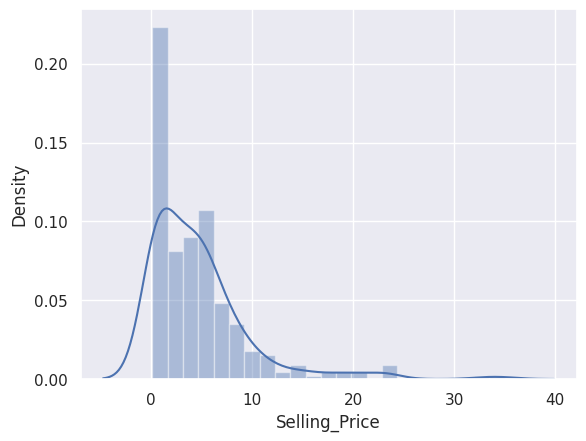

In [14]:
sns.distplot(car_data['Selling_Price'])

<ipython-input-15-bf283cd07397>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data['Present_Price'])


<Axes: xlabel='Present_Price', ylabel='Density'>

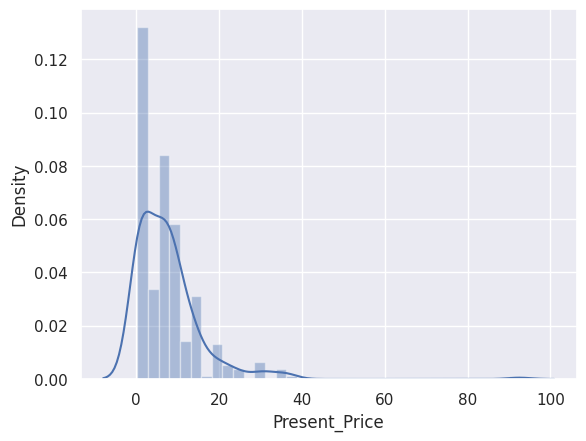

In [15]:
sns.distplot(car_data['Present_Price'])

<ipython-input-16-79e54950a086>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data['Kms_Driven'])


<Axes: xlabel='Kms_Driven', ylabel='Density'>

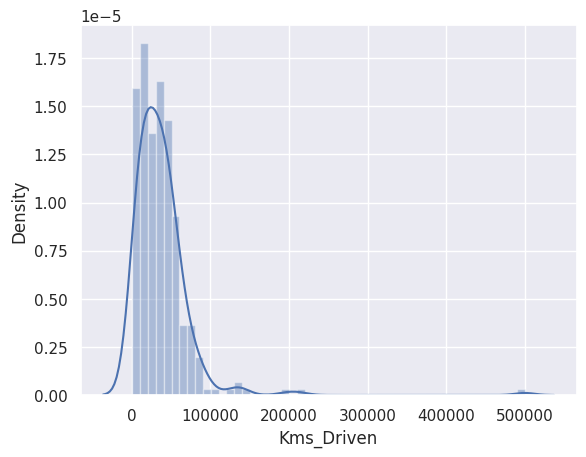

In [16]:
sns.distplot(car_data['Kms_Driven'])



In [23]:
car_data.replace({'Fuel_Type' : {'Petrol' :0, 'Diesel' : 1, 'CNG' : 2}}, inplace = True)
car_data.replace({'Seller_Type' : {'Dealer' :0, 'Individual' : 1}}, inplace = True)

car_data.replace({'Transmission' : {'Manual' :0, 'Automatic' : 1}}, inplace = True)



In [24]:
car_data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [25]:
X = car_data.drop(columns = [	'Car_Name','Seller_Type' ], axis = 1)
Y = car_data['Seller_Type']


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train,Y_train)

LinearRegression()

In [52]:
print(Y_test)

99     0
161    1
89     0
30     0
232    0
290    0
35     0
7      0
183    1
13     0
269    0
65     0
178    1
258    0
227    0
133    1
130    1
156    1
237    0
262    0
112    1
282    0
164    1
275    0
154    1
29     0
141    1
192    1
216    0
3      0
159    1
Name: Seller_Type, dtype: int64


In [53]:
pred_data = model.predict(X_test)


In [54]:
print(pred_data)

[-0.04827947  0.56579308  0.32830561  0.33275918  0.22841122  0.35617341
  0.27464117  0.2014924   0.56815071  0.27963511  0.24762832  0.27344742
  0.79361309  0.14936368  0.40246883  0.58610323  0.58653601  0.59781623
 -0.0659606   0.37624583  0.53795807  0.06880677  0.59096334  0.25530203
  0.57372334  0.14181373  0.57869417  0.64175126  0.46154691  0.42561121
  0.82610555]


In [57]:
mae = metrics.mean_absolute_error(Y_test , pred_data)
mae

0.30550596138691183